## Question 1
### Two-Armed Bandit Problem
---

For any patient, <u>treatment A</u> has probability of success $\alpha$ i.e. $P(S|A) = \alpha$ and similiary for <u>treatment B</u>, $P(S|B)=\beta$. For the random strategy, each patient is allocated a treatment at random with even probability. The total probability of success can be calculated using 'Law of Total Probability". 





   $$ \begin{align}
                P(S)= p_R & = P(S|A)P(A) + P(S|B)P(B)\\
                          & = \frac{1}{2}\alpha + \frac{1}{2}\beta\\ 
                          & = \frac{1}{2}(\alpha+\beta)
       \end{align}$$
       

The two armed bandit strategy is a type of reinforcement learning strategy, where the overall probability of success is increased over the trials. The treatment with better results is rewarded and is applied till it fails. In the long run, this strategy would yield better results as more patients would have recieved the better treatment as opposed to random strategy where both treatments had the same probability of being allocated. This also connects with the exploration and exploitation strategy where over the trials, all the arms(or bandits) were explored and in the end the arm with better gain is exploited. 

The Markov chain for the state space {(A,S}, (A,F), (B,S), (B,F)} where (A,S) represents patient n has been given treatement A and it was successful is :

![Markov Chain](img/4x4.png "Markov Chain")

Therefore, the transition matrix can be given as (in the original order): 
$$p=
    \begin{pmatrix}
    \alpha&1-\alpha&0&0\\
    0&0&\beta&1-\beta\\
    0&0&\beta&1-\beta\\
    \alpha&1-\alpha&0&0
    \end{pmatrix}
$$

Let us define the equilibrium distribution as $\pi= (\pi_1,\pi_2,\pi_3,\pi_4)$ such that $\pi_1+\pi_2+\pi_3+\pi_4 =1$

The condition for equilibrium ditribution is $ \pi^{T}p=\pi^{T}$


$$ 
   (\pi_1,\pi_2,\pi_3,\pi_4)  \begin{pmatrix}
    \alpha&1-\alpha&0&0\\
    0&0&\beta&1-\beta\\
    0&0&\beta&1-\beta\\
    \alpha&1-\alpha&0&0
    \end{pmatrix}= (\pi_1,\pi_2,\pi_3,\pi_4)
$$

Solving this gives us following equations and along with the constraint provides us 5 linear equations : 


$$ 
    \alpha\pi_1 + \alpha\pi_4=\pi_1\\
    (1-\alpha)\pi_1 + (1-\alpha)\pi_4=\pi_2\\
    \beta\pi_2 + \beta\pi_3=\pi_3\\
    (1-\beta)\pi_2 + (1-\beta)\pi_3=\pi_4\\
    \pi_1+\pi_2+\pi_3+\pi_4 =1
$$

Solving these equations gives, 
$$ \pi_1 = \frac{\alpha}{1-\alpha}\pi_4\\ $$

 $$  \pi_2=\pi_4$$
 
 $$\pi_3=\frac{\beta}{1-\beta}\pi_4$$
 
Substituting these in the last constraint equation :
$$ 
    \begin{align}
    \left(\frac{\alpha}{1-\alpha} + 1 + \frac{\beta}{1-\beta} +1\right)\pi_4 = 1\\
   \left(\frac{\alpha}{1-\alpha} +\frac{\beta}{1-\beta} +2\right)\pi_4=1\\
   \left(\frac{\alpha-\alpha\beta + \beta - \alpha\beta +2(1-\alpha)(1-\beta)}{(1-\alpha)(1-\beta)}\right)\pi_4=1\\
   \left(\frac{2-\alpha-\beta}{(1-\alpha)(1-\beta)}\right)\pi_4=1\\
   \left(\frac{(1-\alpha)(1-\beta)}{2-\alpha-\beta}\right)=\pi_4
      \end{align}
$$

Solving for, $\pi_1,\pi_2,\pi_3$ gives us by substitution 

$$ \pi_1 = \frac{\alpha(1-\beta)}{2-\alpha-\beta}$$

$$ \pi_2 = \frac{(1-\alpha)(1-\beta)}{2-\alpha-\beta}$$

$$ \pi_3 = \frac{\beta(1-\alpha)}{2-\alpha-\beta}$$

The long term probability of success for two-armed bandit strategy is <u> **equilibrium probability distribution of (A,S)  + equilibrium probability distribution of (B,S)**</u>
$$ 
    \begin{align}
    p_T &= \pi_1 + \pi_3\\
    &=\frac{\alpha(1-\beta)}{2-\alpha-\beta} + \frac{\beta(1-\alpha)}{2-\alpha-\beta}\\
    &=\frac{\alpha+\beta-2\alpha\beta}{2-\alpha-\beta}
    \end{align}
    $$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

<IPython.core.display.Javascript object>


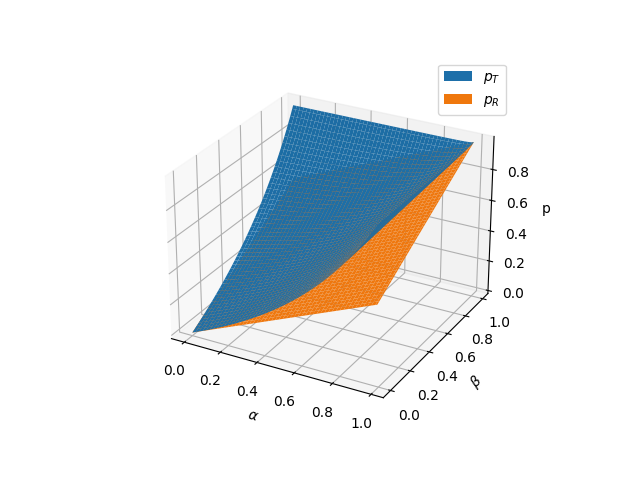

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def ptt(x,y):
    return (x+y-2*x*y)/(2-x-y)
def prr(x,y):
    return (x+y)/2

alpha = np.arange(0,1,0.01)
beta = np.arange(0,1,0.01)
ALPHA,BETA = np.meshgrid(alpha,beta) 
pt= ptt(ALPHA,BETA)
pr= prr(ALPHA,BETA)

f1 = ax.plot_surface(ALPHA,BETA,pt,label='$p_T$')
f1._facecolors2d=f1._facecolors3d
f1._edgecolors2d=f1._edgecolors3d


f2= ax.plot_surface(ALPHA,BETA,pr,label='$p_R$')
f2._facecolors2d=f2._facecolors3d
f2._edgecolors2d=f2._edgecolors3d

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel('p')
ax.legend()
plt.show()

Here, we can see that $p_T$ is always on or above $p_R$ regardless of values of $\alpha$ and $\beta$. Therefore, $p_T-p_R\geq0$. This implies that, two-armed bandit strategy is always atleast better than random strategy in the long run. This is beneficial as it does not need us to know which is the better treatment. In the long run, the better one will always be exploited.